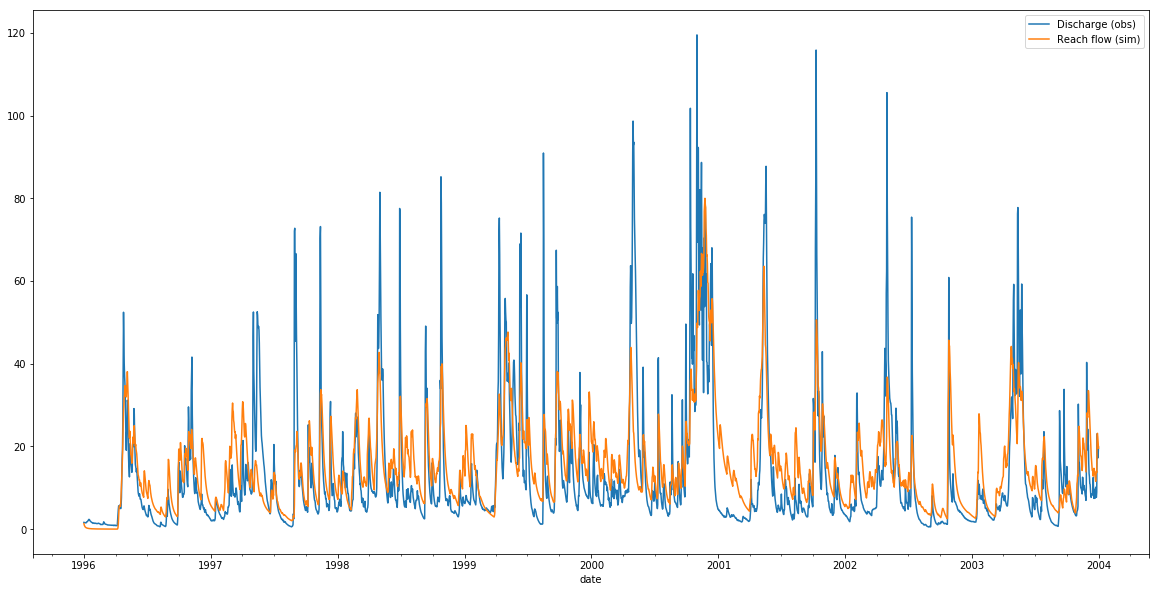

In [3]:
import inca
import numpy as np
import pandas as pd
import datetime as dt

def plot_flow_vs_discharge(ds):
	discharge = ds.get_input_series('Discharge', ['Tveitvatn'], alignwithresults=True)
	flow      = ds.get_result_series('Reach flow', ['Tveitvatn'])
	start_date = dt.datetime.strptime(ds.get_parameter_time('Start date', []),'%Y-%m-%d')
	timesteps = ds.get_parameter_uint('Timesteps', [])
	
	date_idx = np.array(pd.date_range(start_date, periods=timesteps))
	df = pd.DataFrame({'date' : date_idx, 'Discharge (obs)' :  discharge, 'Reach flow (sim)' : flow })
	df.set_index('date',inplace=True)

	df.plot(figsize=(20,10))

dataset = inca.DataSet.setup_from_parameter_and_input_files('../IncaN/tovdalparametersPersistOnly.dat', '../IncaN/tovdalinputs.dat')

dataset.run_model()

plot_flow_vs_discharge(dataset)

dataset.delete() # You can optionally do this at the end. It is not necessary if your python process closes down, because then the operating system will do it for you. Also, this will not delete the model itself, only the dataset (I have not exposed any functionality for deleting the model atm.)
